## 1. Kutubxonalarni Import Qilish

In [24]:
# Asosiy kutubxonalar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Grafik sozlamalari
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 2. Ma'lumotlar Yaratish

In [25]:
# Sodda ma'lumotlar to'plami
np.random.seed(42)

# Turli taqsimotlar
normal_data = np.random.normal(50, 10, 100)  # Normal taqsimot
skewed_data = np.random.exponential(2, 100)  # Qiyshaygan taqsimot
outlier_data = np.concatenate([np.random.normal(50, 5, 95), [10, 15, 85, 90, 95]])  # Outlier bilan

print("Ma'lumotlar yaratildi:")
print(f"Normal ma'lumotlar: {len(normal_data)} ta")
print(f"Qiyshaygan ma'lumotlar: {len(skewed_data)} ta")
print(f"Outlier bilan: {len(outlier_data)} ta")

# Statistikalarni ko'rish
print("\n📊 Normal ma'lumotlar statistikasi:")
print(f"O'rtacha: {normal_data.mean():.2f}")
print(f"Mediana: {np.median(normal_data):.2f}")
print(f"Standart og'ish: {normal_data.std():.2f}")

Ma'lumotlar yaratildi:
Normal ma'lumotlar: 100 ta
Qiyshaygan ma'lumotlar: 100 ta
Outlier bilan: 100 ta

📊 Normal ma'lumotlar statistikasi:
O'rtacha: 48.96
Mediana: 48.73
Standart og'ish: 9.04


## 3. Boxplotning Asosiy Qismlari

Boxplot 5 ta asosiy elementdan iborat:

1. **Box (Quti)** - Q1 dan Q3 gacha (IQR)
2. **Median chiziq** - Q2 (50% kvantil)
3. **Whiskers (Mo'ylovlar)** - Min/Max yoki outlier chegaralarigacha
4. **Outliers** - Chetga chiquvchi qiymatlar
5. **Caps** - Whiskerlar oxiridagi kichik chiziqlar

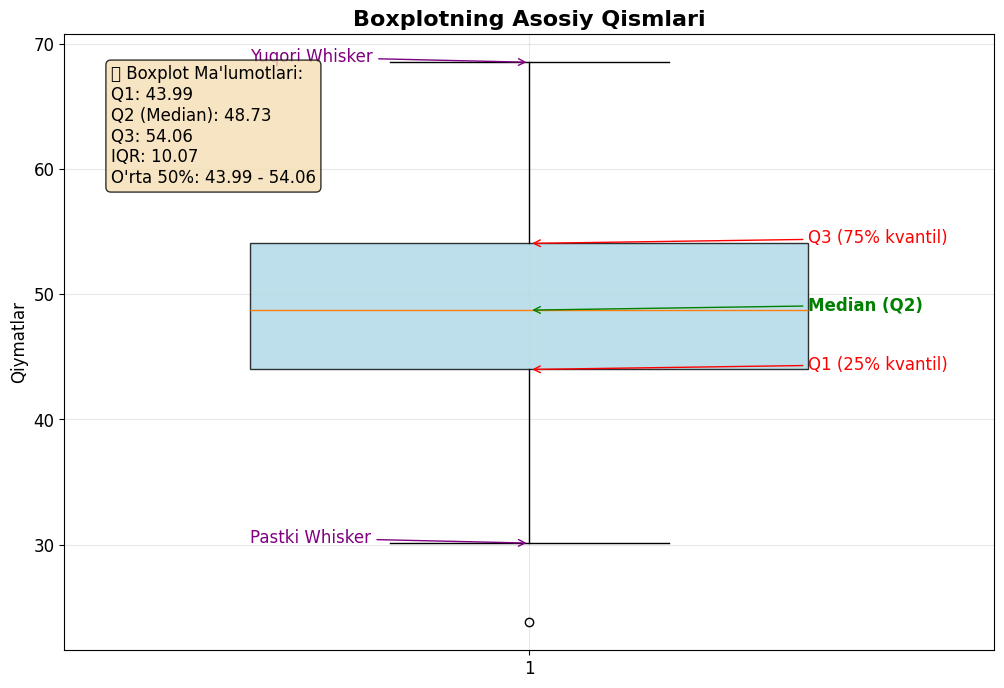

In [27]:
# Boxplotning qismlarini ko'rsatish
fig, ax = plt.subplots(figsize=(12, 8))

# Sodda boxplot
bp = ax.boxplot(normal_data, patch_artist=True, widths=0.6)

# Qutini ranglash
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][0].set_alpha(0.8)

# Elementlarni belgilash
Q1, Q2, Q3 = np.percentile(normal_data, [25, 50, 75])
IQR = Q3 - Q1

# Annotatsiyalar qo'shish
ax.annotate('Q3 (75% kvantil)', xy=(1, Q3), xytext=(1.3, Q3),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=12, color='red')

ax.annotate('Median (Q2)', xy=(1, Q2), xytext=(1.3, Q2),
            arrowprops=dict(arrowstyle='->', color='green'),
            fontsize=12, color='green', weight='bold')

ax.annotate('Q1 (25% kvantil)', xy=(1, Q1), xytext=(1.3, Q1),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=12, color='red')

ax.annotate('Yuqori Whisker', xy=(1, bp['whiskers'][1].get_ydata()[1]), 
            xytext=(0.7, bp['whiskers'][1].get_ydata()[1]),
            arrowprops=dict(arrowstyle='->', color='purple'),
            fontsize=12, color='purple')

ax.annotate('Pastki Whisker', xy=(1, bp['whiskers'][0].get_ydata()[1]), 
            xytext=(0.7, bp['whiskers'][0].get_ydata()[1]),
            arrowprops=dict(arrowstyle='->', color='purple'),
            fontsize=12, color='purple')

# Boxplot haqida ma'lumot
info_text = f"""📊 Boxplot Ma'lumotlari:
Q1: {Q1:.2f}
Q2 (Median): {Q2:.2f}
Q3: {Q3:.2f}
IQR: {IQR:.2f}
O'rta 50%: {Q1:.2f} - {Q3:.2f}"""

ax.text(0.05, 0.95, info_text, transform=ax.transAxes, 
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_title('Boxplotning Asosiy Qismlari', fontsize=16, fontweight='bold')
ax.set_ylabel('Qiymatlar')
ax.grid(True, alpha=0.3)
plt.show()

## 4. Sodda Boxplot Yaratish (Matplotlib)

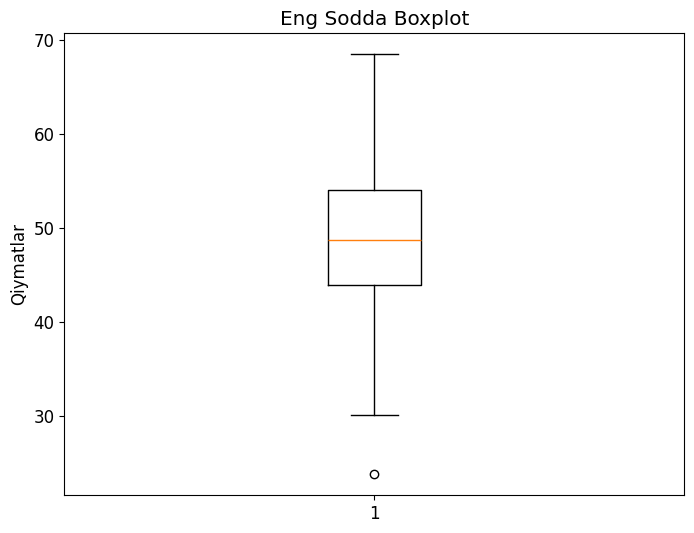

In [20]:
# 1. Eng sodda boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(normal_data)
plt.title('Eng Sodda Boxplot')
plt.ylabel('Qiymatlar')
plt.show()

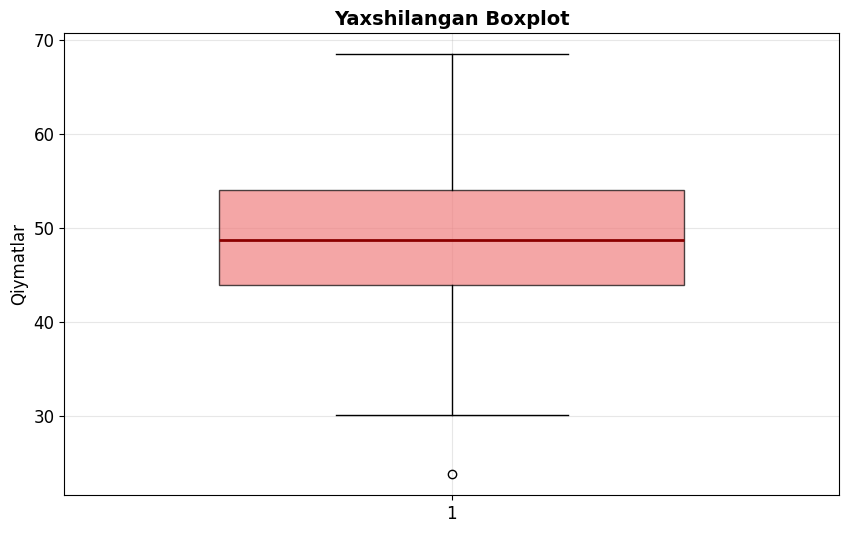

In [21]:
# 2. Yaxshilangan boxplot
plt.figure(figsize=(10, 6))

# Boxplot yaratish
bp = plt.boxplot(normal_data, 
                 patch_artist=True,  # Qutini ranglash uchun
                 notch=False,        # Notch yo'q
                 widths=0.6)         # Quti kengligi

# Ranglarni sozlash
bp['boxes'][0].set_facecolor('lightcoral')  # Quti rangi
bp['boxes'][0].set_alpha(0.7)               # Shaffoflik
bp['medians'][0].set_color('darkred')       # Median chiziq rangi
bp['medians'][0].set_linewidth(2)           # Median chiziq qalinligi

plt.title('Yaxshilangan Boxplot', fontsize=14, fontweight='bold')
plt.ylabel('Qiymatlar')
plt.grid(True, alpha=0.3)
plt.show()


## 5. Bir Nechta Ma'lumot Bilan Boxplot

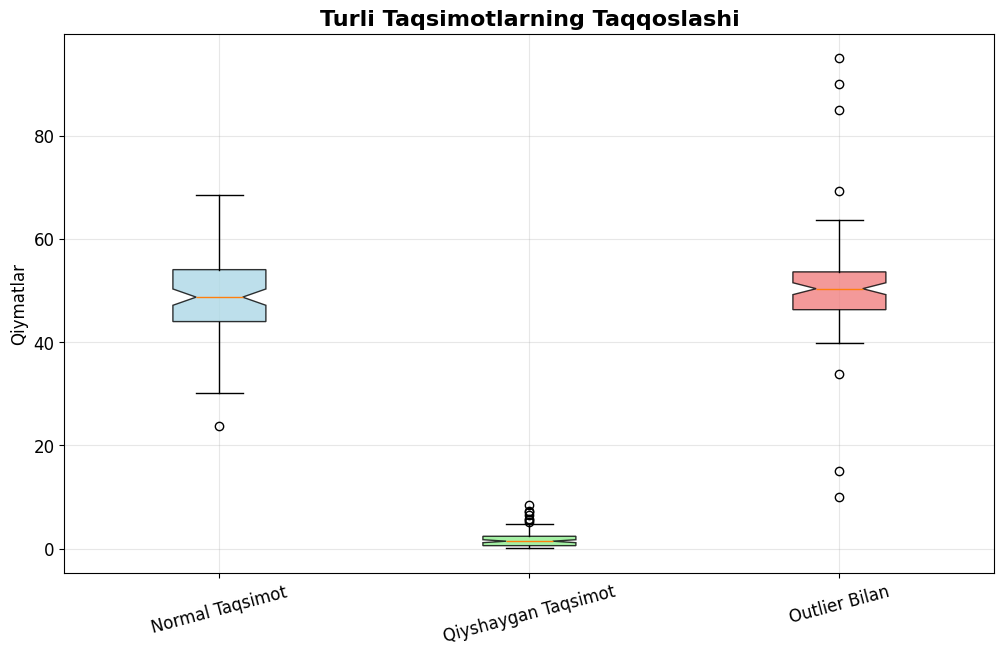

📊 Taqsimotlar taqqoslashi:

Normal Taqsimot:
  Median: 48.73
  IQR: 10.07
  O'rtacha: 48.96

Qiyshaygan Taqsimot:
  Median: 1.42
  IQR: 1.82
  O'rtacha: 1.88

Outlier Bilan:
  Median: 50.37
  IQR: 7.33
  O'rtacha: 50.67


In [28]:
# Bir nechta ma'lumot to'plamini taqqoslash
plt.figure(figsize=(12, 7))

# Ma'lumotlar ro'yxati
data_list = [normal_data, skewed_data, outlier_data]
labels = ['Normal Taqsimot', 'Qiyshaygan Taqsimot', 'Outlier Bilan']

# Boxplot yaratish
bp = plt.boxplot(data_list, 
                 labels=labels,
                 patch_artist=True,
                 notch=True)  # Mediana uchun notch

# Har bir qutiga boshqa rang berish
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

plt.title('Turli Taqsimotlarning Taqqoslashi', fontsize=16, fontweight='bold')
plt.ylabel('Qiymatlar')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=15)
plt.show()

# Statistikalarni taqqoslash
print("📊 Taqsimotlar taqqoslashi:")
for i, (data, label) in enumerate(zip(data_list, labels)):
    Q1, Q2, Q3 = np.percentile(data, [25, 50, 75])
    print(f"\n{label}:")
    print(f"  Median: {Q2:.2f}")
    print(f"  IQR: {Q3-Q1:.2f}")
    print(f"  O'rtacha: {data.mean():.2f}")

## 6. Seaborn bilan Boxplot (Zamonaviy Uslub)

In [7]:
# Seaborn uchun ma'lumotlar tayyorlash
df = pd.DataFrame({
    'Taqsimot': ['Normal'] * len(normal_data) + 
                ['Qiyshaygan'] * len(skewed_data) + 
                ['Outlier bilan'] * len(outlier_data),
    'Qiymat': np.concatenate([normal_data, skewed_data, outlier_data])
})

print("Ma'lumotlar DataFrame shaklida:")
print(df.head())
print(f"\nJami qatorlar: {len(df)}")

Ma'lumotlar DataFrame shaklida:
  Taqsimot     Qiymat
0   Normal  54.967142
1   Normal  48.617357
2   Normal  56.476885
3   Normal  65.230299
4   Normal  47.658466

Jami qatorlar: 300


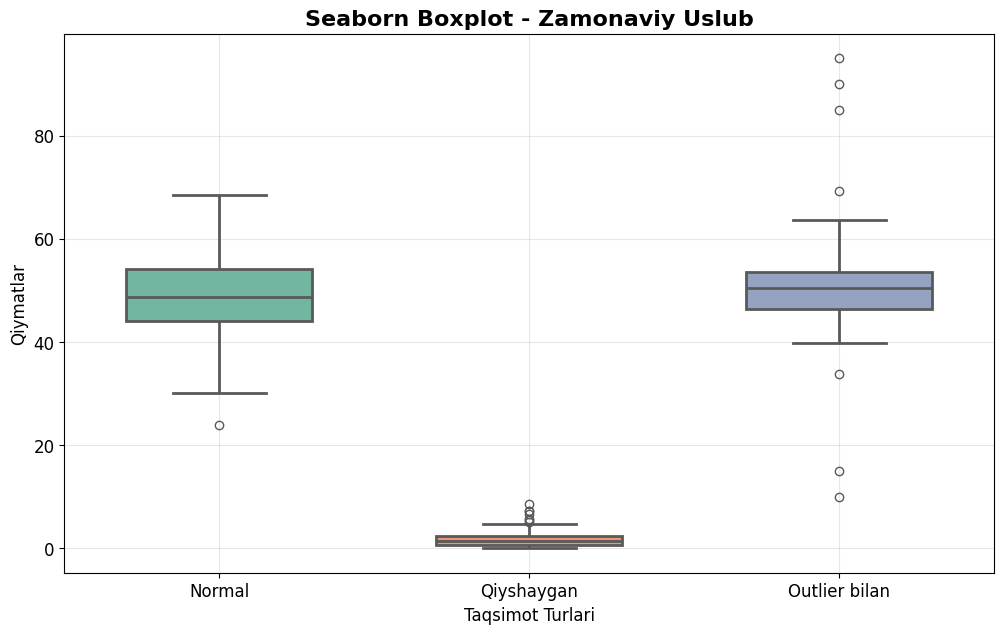

✅ Seaborn boxplot - avtomatik chiroyli dizayn!


In [8]:
# Seaborn boxplot - zamonaviy ko'rinish
plt.figure(figsize=(12, 7))

# Asosiy boxplot
sns.boxplot(data=df, x='Taqsimot', y='Qiymat', 
            palette='Set2',      # Chiroyli ranglar
            width=0.6,           # Quti kengligi
            linewidth=2)         # Chiziq qalinligi

plt.title('Seaborn Boxplot - Zamonaviy Uslub', fontsize=16, fontweight='bold')
plt.ylabel('Qiymatlar')
plt.xlabel('Taqsimot Turlari')
plt.grid(True, alpha=0.3)
plt.show()

print("✅ Seaborn boxplot - avtomatik chiroyli dizayn!")

## 7. Boxplot Turlari

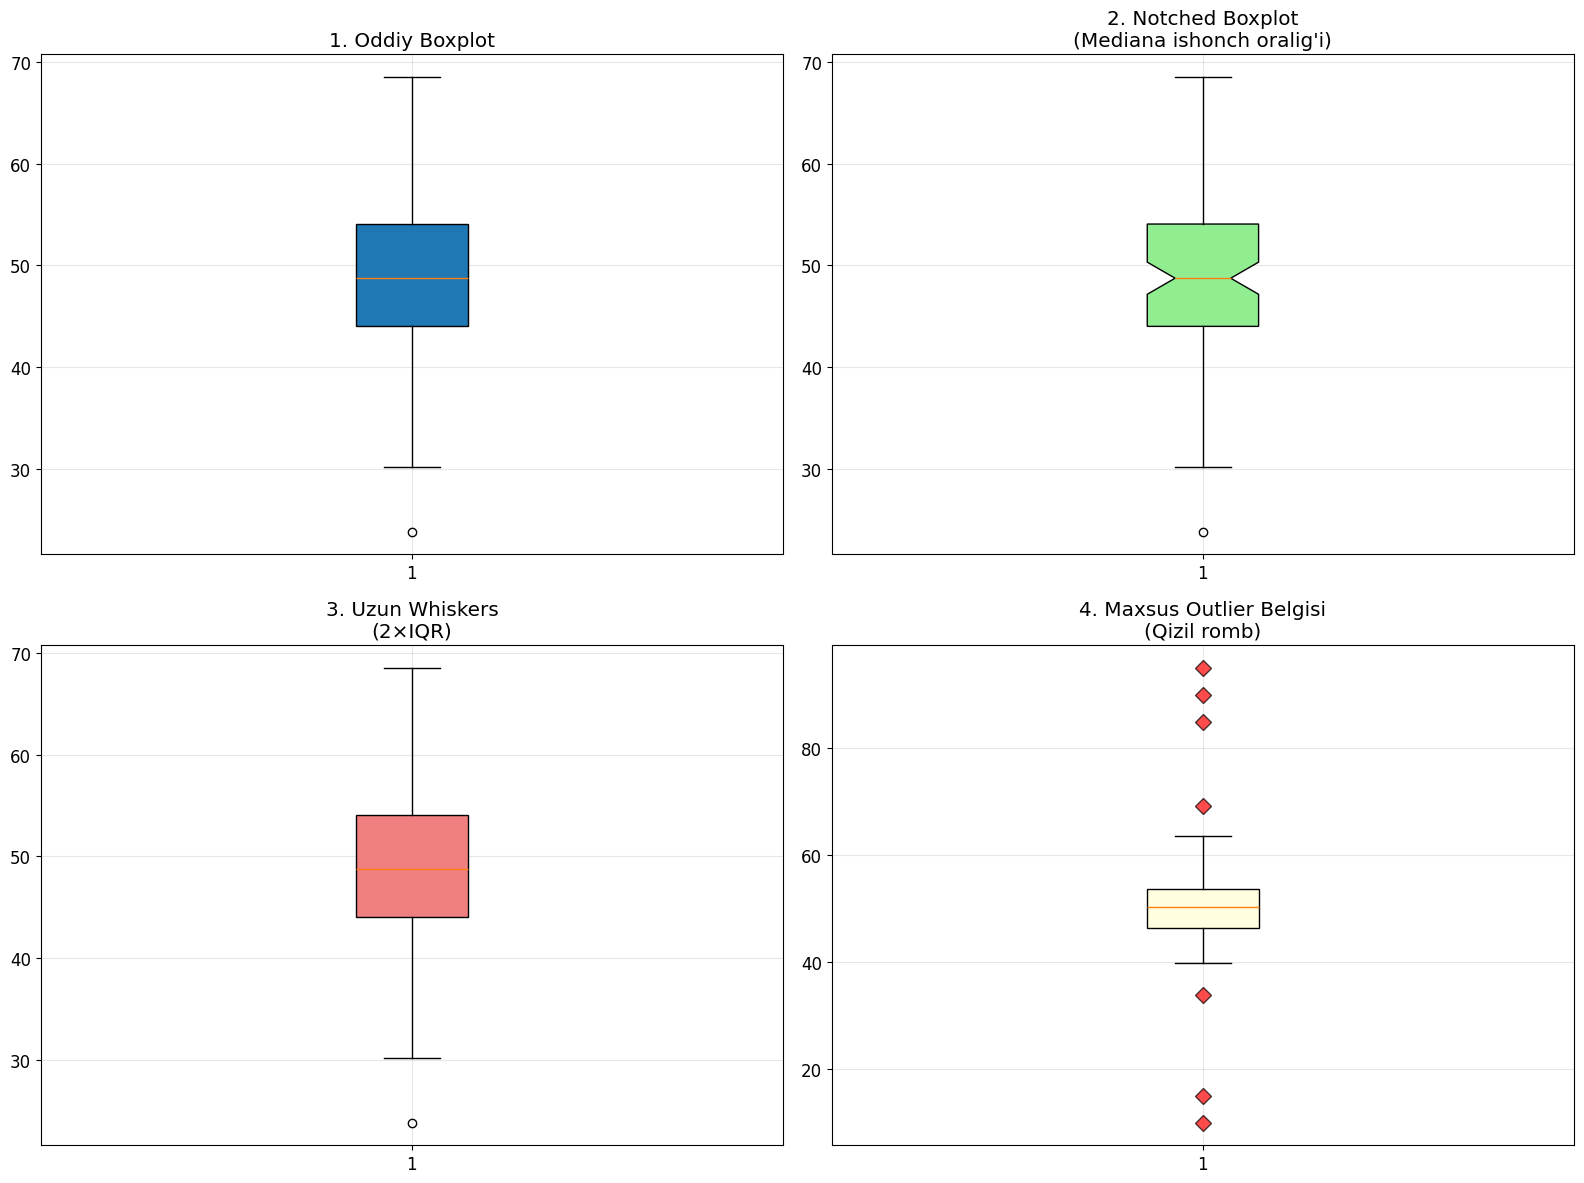

In [22]:
# Turli boxplot turlari
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Oddiy boxplot
axes[0, 0].boxplot(normal_data, patch_artist=True)
axes[0, 0].set_title('1. Oddiy Boxplot')
axes[0, 0].grid(True, alpha=0.3)

# 2. Notched boxplot (mediana uchun ishonch oralig'i)
bp1 = axes[0, 1].boxplot(normal_data, notch=True, patch_artist=True)
bp1['boxes'][0].set_facecolor('lightgreen')
axes[0, 1].set_title('2. Notched Boxplot\n(Mediana ishonch oralig\'i)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Whisker uzunligini o'zgartirish
bp2 = axes[1, 0].boxplot(normal_data, whis=2.0, patch_artist=True)  # 2×IQR
bp2['boxes'][0].set_facecolor('lightcoral')
axes[1, 0].set_title('3. Uzun Whiskers\n(2×IQR)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Outlier belgisini o'zgartirish
bp3 = axes[1, 1].boxplot(outlier_data, patch_artist=True,
                        flierprops=dict(marker='D', markerfacecolor='red', 
                                      markersize=8, alpha=0.7))
bp3['boxes'][0].set_facecolor('lightyellow')
axes[1, 1].set_title('4. Maxsus Outlier Belgisi\n(Qizil romb)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Violin Plot - Boxplot + Taqsimot Shakli

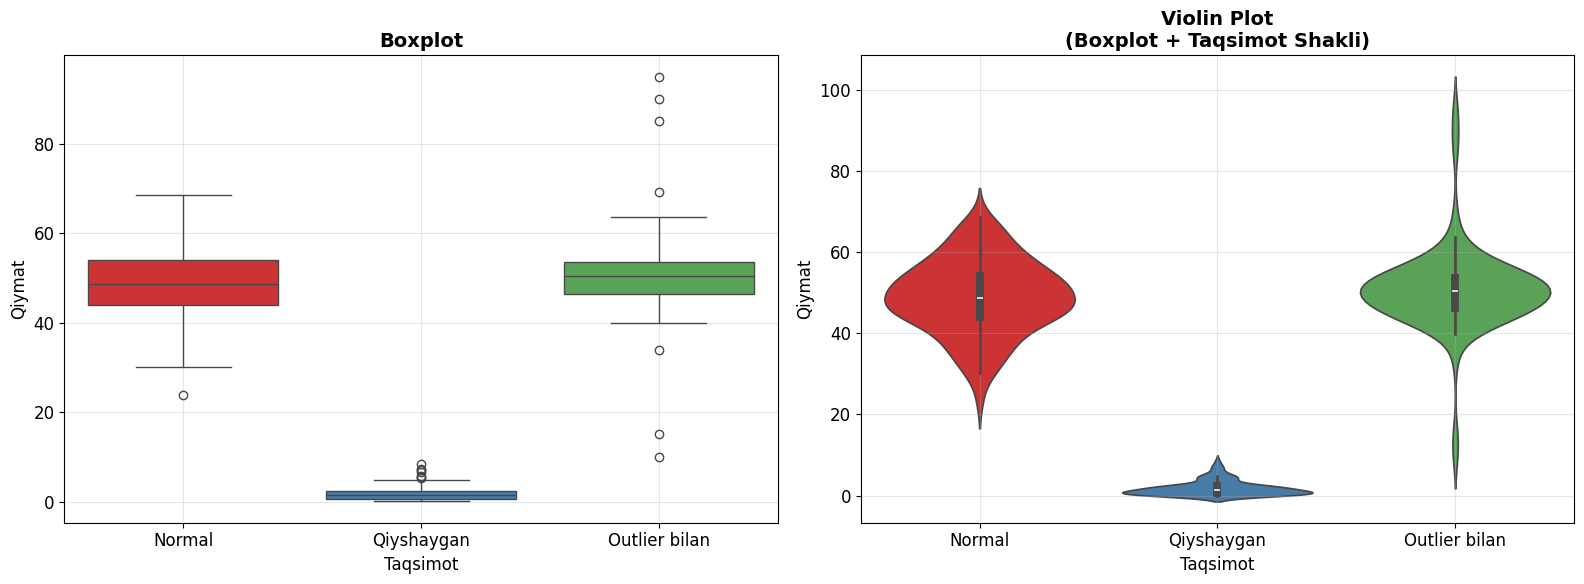

In [23]:
# Violin plot - boxplot va zichlik birgalikda
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
sns.boxplot(data=df, x='Taqsimot', y='Qiymat', ax=axes[0], palette='Set1')
axes[0].set_title('Boxplot', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Violin plot
sns.violinplot(data=df, x='Taqsimot', y='Qiymat', ax=axes[1], palette='Set1')
axes[1].set_title('Violin Plot\n(Boxplot + Taqsimot Shakli)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Real Ma'lumotlar - Talabalar Baholari

In [11]:
# Real ma'lumotlar yaratish - talabalar baholari
np.random.seed(123)

# Turli fanlar bo'yicha baholar
matematika = np.random.normal(75, 12, 150)  # O'rtacha 75, std 12
fizika = np.random.normal(70, 15, 150)      # O'rtacha 70, std 15  
kimyo = np.random.normal(80, 10, 150)       # O'rtacha 80, std 10
biologiya = np.random.normal(78, 8, 150)    # O'rtacha 78, std 8

# Baholarni 0-100 oralig'ida cheklash
matematika = np.clip(matematika, 0, 100)
fizika = np.clip(fizika, 0, 100)
kimyo = np.clip(kimyo, 0, 100)
biologiya = np.clip(biologiya, 0, 100)

# Bir nechta outlier qo'shish
matematika = np.append(matematika, [25, 30, 95, 98])  # Past va yuqori outlierlar
fizika = np.append(fizika, [15, 20, 96, 99])

print("🎓 Talabalar baholari yaratildi:")
print(f"Matematika: O'rtacha = {matematika.mean():.1f}, Std = {matematika.std():.1f}")
print(f"Fizika: O'rtacha = {fizika.mean():.1f}, Std = {fizika.std():.1f}")
print(f"Kimyo: O'rtacha = {kimyo.mean():.1f}, Std = {kimyo.std():.1f}")
print(f"Biologiya: O'rtacha = {biologiya.mean():.1f}, Std = {biologiya.std():.1f}")

🎓 Talabalar baholari yaratildi:
Matematika: O'rtacha = 75.2, Std = 14.1
Fizika: O'rtacha = 67.9, Std = 15.3
Kimyo: O'rtacha = 79.1, Std = 9.3
Biologiya: O'rtacha = 78.7, Std = 8.1


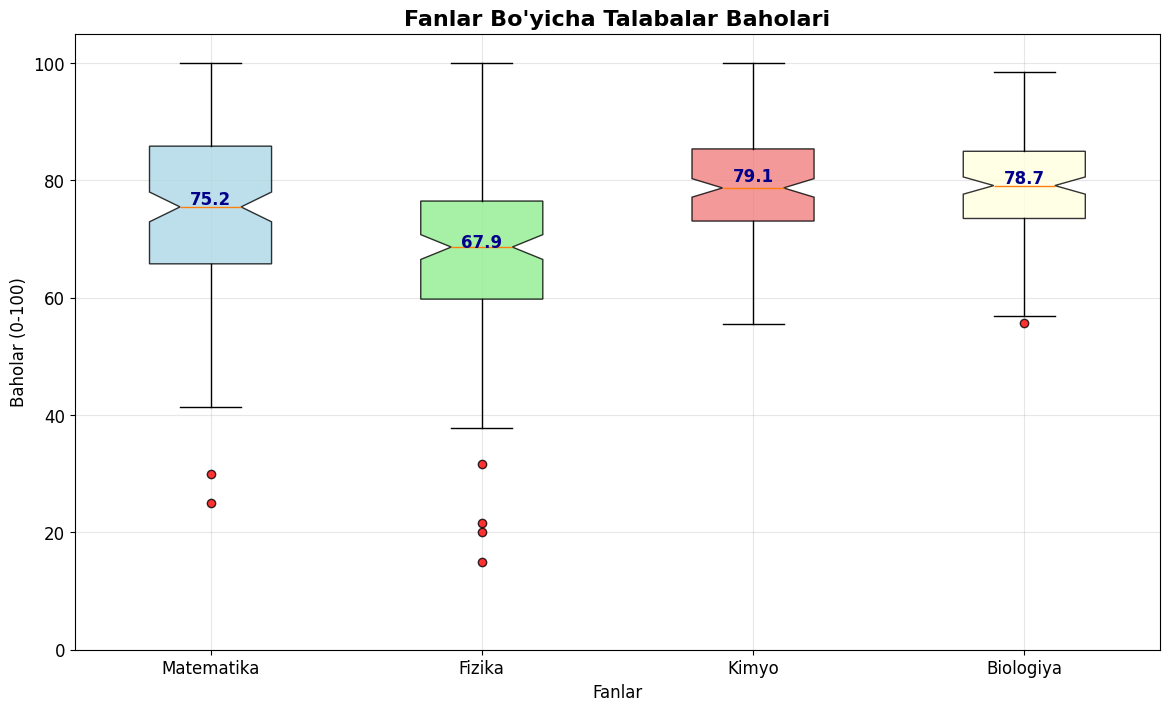

In [12]:
# Fanlar bo'yicha boxplot taqqoslash
plt.figure(figsize=(14, 8))

# Ma'lumotlarni ro'yxat shaklida
fanlar_data = [matematika, fizika, kimyo, biologiya]
fanlar_nomi = ['Matematika', 'Fizika', 'Kimyo', 'Biologiya']

# Boxplot yaratish
bp = plt.boxplot(fanlar_data, 
                 labels=fanlar_nomi,
                 patch_artist=True,
                 notch=True)

# Har fan uchun boshqa rang
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

# Outlierlarni qizil rangda ko'rsatish
for flier in bp['fliers']:
    flier.set_markerfacecolor('red')
    flier.set_markersize(6)
    flier.set_alpha(0.8)

plt.title('Fanlar Bo\'yicha Talabalar Baholari', fontsize=16, fontweight='bold')
plt.ylabel('Baholar (0-100)')
plt.xlabel('Fanlar')
plt.grid(True, alpha=0.3)
plt.ylim(0, 105)

# O'rtacha chiziqlarni qo'shish
for i, data in enumerate(fanlar_data):
    plt.text(i+1, data.mean(), f'{data.mean():.1f}', 
             ha='center', va='bottom', fontweight='bold', color='darkblue')

plt.show()

In [13]:
# Har fan uchun batafsil statistika
print("📊 Fanlar bo'yicha batafsil statistika:")
print("=" * 60)

for fan, data in zip(fanlar_nomi, fanlar_data):
    Q1, Q2, Q3 = np.percentile(data, [25, 50, 75])
    IQR = Q3 - Q1
    
    # Outlierlarni aniqlash
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    print(f"\n{fan}:")
    print(f"  Q1: {Q1:.1f}, Q2: {Q2:.1f}, Q3: {Q3:.1f}")
    print(f"  IQR: {IQR:.1f}")
    print(f"  O'rtacha: {data.mean():.1f}")
    print(f"  Outlierlar soni: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  Outlier qiymatlar: {sorted(outliers.round(1))}")

📊 Fanlar bo'yicha batafsil statistika:

Matematika:
  Q1: 65.8, Q2: 75.5, Q3: 85.8
  IQR: 20.1
  O'rtacha: 75.2
  Outlierlar soni: 2
  Outlier qiymatlar: [np.float64(25.0), np.float64(30.0)]

Fizika:
  Q1: 59.8, Q2: 68.6, Q3: 76.5
  IQR: 16.7
  O'rtacha: 67.9
  Outlierlar soni: 4
  Outlier qiymatlar: [np.float64(15.0), np.float64(20.0), np.float64(21.5), np.float64(31.6)]

Kimyo:
  Q1: 73.1, Q2: 78.7, Q3: 85.4
  IQR: 12.3
  O'rtacha: 79.1
  Outlierlar soni: 0

Biologiya:
  Q1: 73.5, Q2: 79.1, Q3: 85.0
  IQR: 11.5
  O'rtacha: 78.7
  Outlierlar soni: 1
  Outlier qiymatlar: [np.float64(55.7)]


## 10. Guruhli Tahlil - Erkak vs Ayol Talabalar

In [14]:
# Jins bo'yicha ma'lumotlar yaratish
np.random.seed(456)

# Erkak talabalar baholari
erkak_mat = np.random.normal(73, 13, 100)
erkak_fiz = np.random.normal(75, 12, 100)

# Ayol talabalar baholari  
ayol_mat = np.random.normal(77, 11, 100)
ayol_fiz = np.random.normal(68, 14, 100)

# DataFrame yaratish
df_jins = pd.DataFrame({
    'Jins': ['Erkak'] * 100 + ['Ayol'] * 100 + ['Erkak'] * 100 + ['Ayol'] * 100,
    'Fan': ['Matematika'] * 200 + ['Fizika'] * 200,
    'Baho': np.concatenate([erkak_mat, ayol_mat, erkak_fiz, ayol_fiz])
})

# Baholarni 0-100 oralig'ida cheklash
df_jins['Baho'] = np.clip(df_jins['Baho'], 0, 100)

print("👥 Jins bo'yicha ma'lumotlar yaratildi:")
print(df_jins.head())
print(f"\nJami qatorlar: {len(df_jins)}")

👥 Jins bo'yicha ma'lumotlar yaratildi:
    Jins         Fan       Baho
0  Erkak  Matematika  64.314329
1  Erkak  Matematika  66.523276
2  Erkak  Matematika  81.041486
3  Erkak  Matematika  80.392999
4  Erkak  Matematika  90.556623

Jami qatorlar: 400


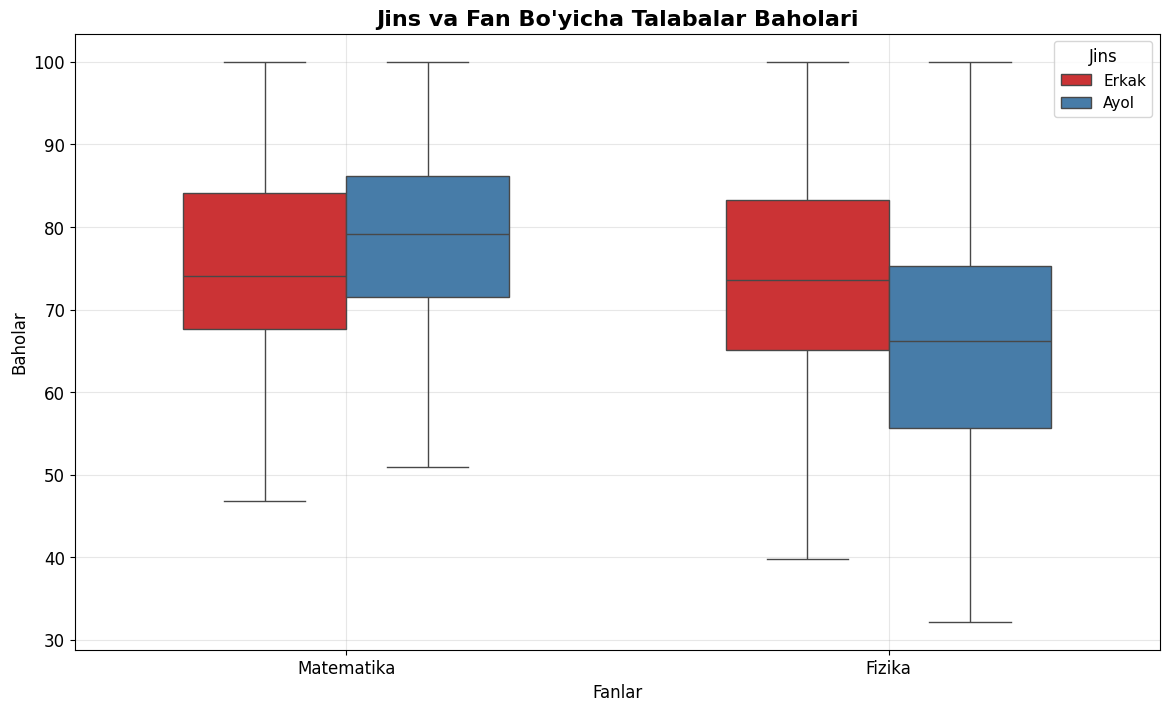

📊 Jins bo'yicha taqqoslash:
                   mean  median    std
Fan        Jins                       
Fizika     Ayol   65.66   66.18  14.51
           Erkak  73.59   73.52  12.92
Matematika Ayol   78.50   79.12  10.88
           Erkak  74.82   74.06  11.89


In [15]:
# Jins va fan bo'yicha boxplot
plt.figure(figsize=(14, 8))

# Seaborn bilan guruhli boxplot
sns.boxplot(data=df_jins, x='Fan', y='Baho', hue='Jins', 
            palette='Set1', width=0.6)

plt.title('Jins va Fan Bo\'yicha Talabalar Baholari', fontsize=16, fontweight='bold')
plt.ylabel('Baholar')
plt.xlabel('Fanlar')
plt.legend(title='Jins', title_fontsize=12, fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

# Statistik taqqoslash
print("📊 Jins bo'yicha taqqoslash:")
comparison = df_jins.groupby(['Fan', 'Jins'])['Baho'].agg(['mean', 'median', 'std']).round(2)
print(comparison)

## 11. Boxplot vs Boshqa Grafiklar

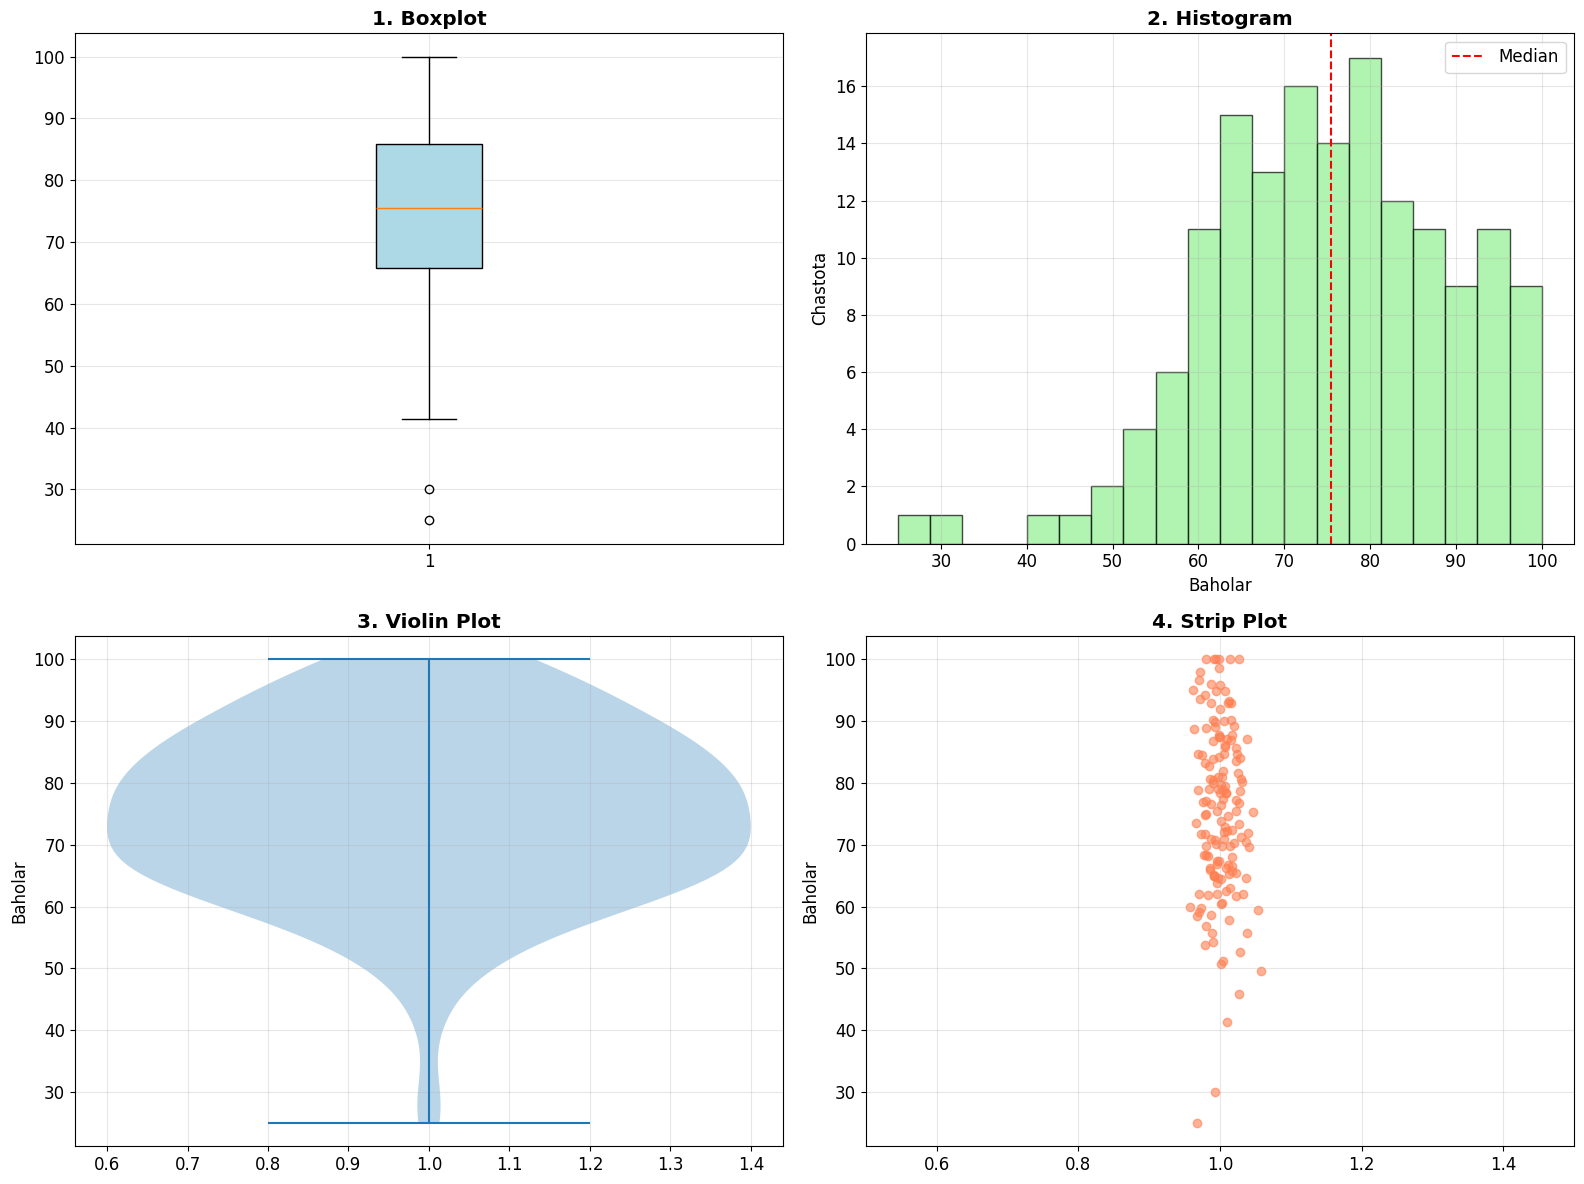

📊 Har bir grafik turining xususiyatlari:
1. Boxplot: Ixcham, outlierlar, kvartillar
2. Histogram: Taqsimot shakli, chastota
3. Violin: Taqsimot + boxplot
4. Strip: Har bir nuqta ko'rinadi


In [16]:
# Bir xil ma'lumotni turli usullar bilan ko'rsatish
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Ma'lumot
data = matematika

# 1. Boxplot
bp = axes[0, 0].boxplot(data, patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
axes[0, 0].set_title('1. Boxplot', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram
axes[0, 1].hist(data, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].axvline(np.median(data), color='red', linestyle='--', label='Median')
axes[0, 1].set_title('2. Histogram', fontweight='bold')
axes[0, 1].set_xlabel('Baholar')
axes[0, 1].set_ylabel('Chastota')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Violin plot
parts = axes[1, 0].violinplot([data], positions=[1], widths=0.8)
axes[1, 0].set_title('3. Violin Plot', fontweight='bold')
axes[1, 0].set_ylabel('Baholar')
axes[1, 0].grid(True, alpha=0.3)

# 4. Strip plot (scatter)
y_pos = np.random.normal(1, 0.02, len(data))  # Tasodifiy y pozitsiyalar
axes[1, 1].scatter(y_pos, data, alpha=0.6, color='coral')
axes[1, 1].set_title('4. Strip Plot', fontweight='bold')
axes[1, 1].set_ylabel('Baholar')
axes[1, 1].set_xlim(0.5, 1.5)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Har bir grafik turining xususiyatlari:")
print("1. Boxplot: Ixcham, outlierlar, kvartillar")
print("2. Histogram: Taqsimot shakli, chastota")
print("3. Violin: Taqsimot + boxplot")
print("4. Strip: Har bir nuqta ko'rinadi")

## 12. Boxplot Talqin Qilish Qoidalari

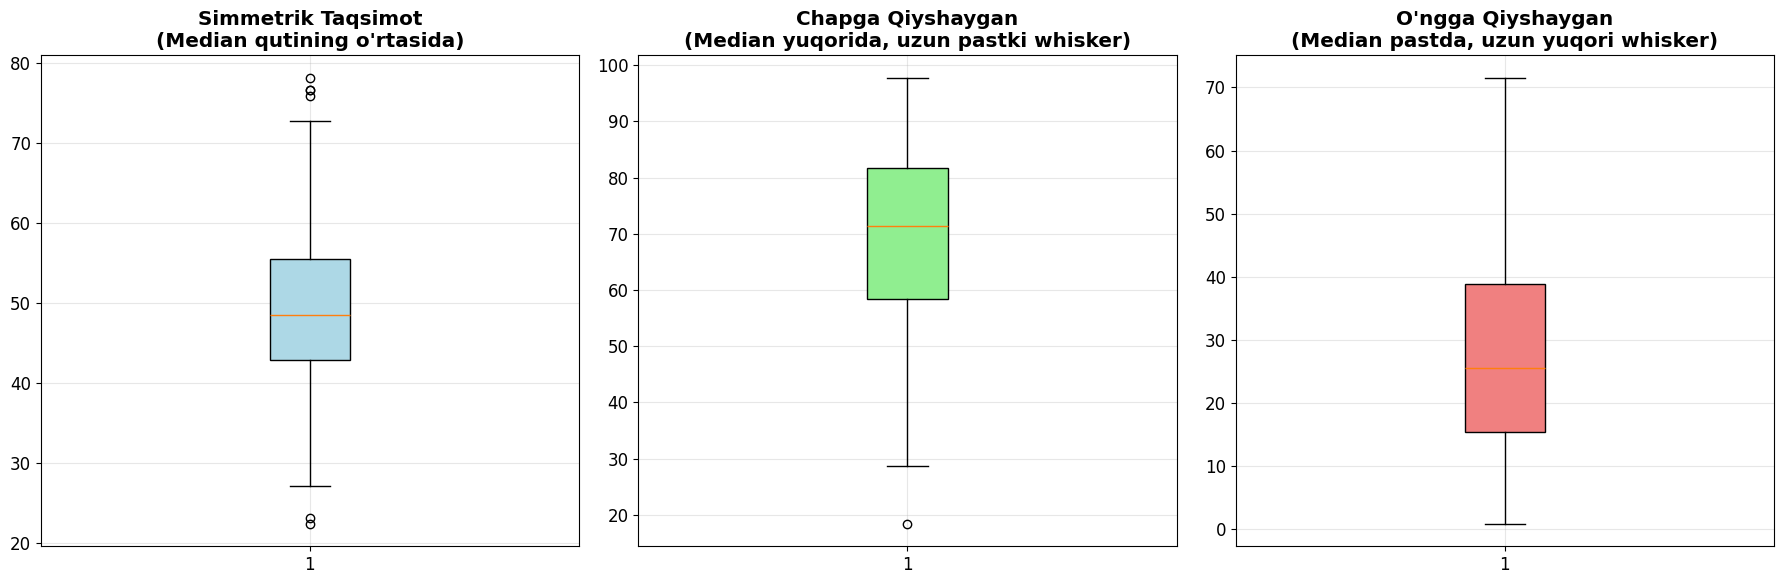

📊 Taqsimotlar tahlili:

Simmetrik:
  O'rtacha: 49.23
  Median: 48.47
  Farq: 0.76
  → Simmetrik taqsimot

Chapga qiyshaygan:
  O'rtacha: 70.07
  Median: 71.42
  Farq: 1.35
  → Chapga qiyshaygan

O'ngga qiyshaygan:
  O'rtacha: 27.77
  Median: 25.48
  Farq: 2.29
  → O'ngga qiyshaygan


In [17]:
# Turli taqsimotlar va ularning talqini
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Simmetrik taqsimot
symmetric_data = np.random.normal(50, 10, 200)
bp1 = axes[0].boxplot(symmetric_data, patch_artist=True)
bp1['boxes'][0].set_facecolor('lightblue')
axes[0].set_title('Simmetrik Taqsimot\n(Median qutining o\'rtasida)', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Chapga qiyshaygan
left_skewed = np.random.beta(5, 2, 200) * 100
bp2 = axes[1].boxplot(left_skewed, patch_artist=True)
bp2['boxes'][0].set_facecolor('lightgreen')
axes[1].set_title('Chapga Qiyshaygan\n(Median yuqorida, uzun pastki whisker)', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# 3. O'ngga qiyshaygan
right_skewed = np.random.beta(2, 5, 200) * 100
bp3 = axes[2].boxplot(right_skewed, patch_artist=True)
bp3['boxes'][0].set_facecolor('lightcoral')
axes[2].set_title('O\'ngga Qiyshaygan\n(Median pastda, uzun yuqori whisker)', fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Har bir taqsimot uchun statistika
datasets = [symmetric_data, left_skewed, right_skewed]
names = ['Simmetrik', 'Chapga qiyshaygan', "O'ngga qiyshaygan"]

print("📊 Taqsimotlar tahlili:")
for name, data in zip(names, datasets):
    mean_val = data.mean()
    median_val = np.median(data)
    print(f"\n{name}:")
    print(f"  O'rtacha: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Farq: {abs(mean_val - median_val):.2f}")
    if abs(mean_val - median_val) < 1:
        print("  → Simmetrik taqsimot")
    elif mean_val > median_val:
        print("  → O'ngga qiyshaygan")
    else:
        print("  → Chapga qiyshaygan")

## 13. Outlierlar Bilan Ishlash


📊 Matematika baholari outlier tahlili:
Jami ma'lumotlar: 154
Normal ma'lumotlar: 152
Outlierlar: 2 (1.3%)
Outlier chegaralari: [35.7, 115.9]
Outlier qiymatlar: [np.float64(25.0), np.float64(30.0)]


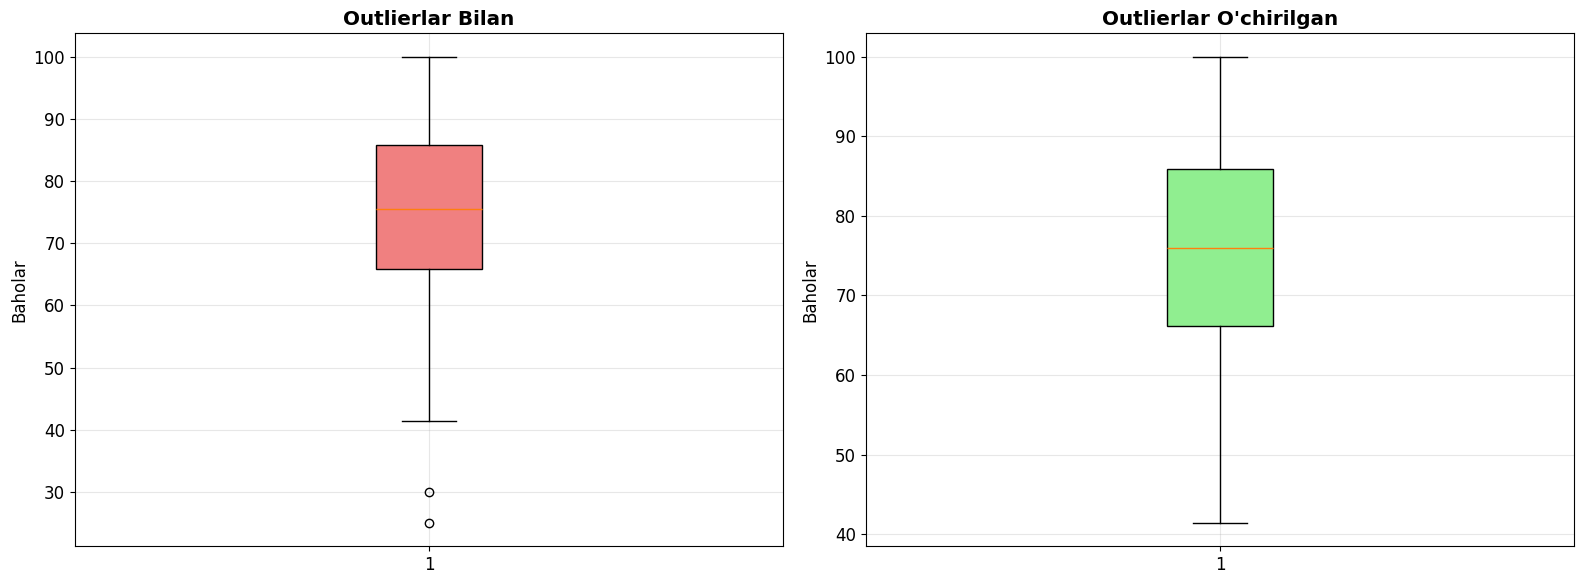


📊 Outlierlar ta'sirini taqqoslash:
Outlierlar bilan - O'rtacha: 75.24, Std: 14.05
Outlierlar o'chirilgan - O'rtacha: 75.87, Std: 13.02
O'rtacha farqi: 0.63
Std farqi: 1.03


In [18]:
# Outlierlarni aniqlash va tahlil qilish
def outlier_analysis(data, name):
    """Outlierlarni aniqlash va tahlil qilish funksiyasi"""
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    
    # Outlier chegaralari
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outlierlarni topish
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    normal_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    print(f"\n📊 {name} outlier tahlili:")
    print(f"Jami ma'lumotlar: {len(data)}")
    print(f"Normal ma'lumotlar: {len(normal_data)}")
    print(f"Outlierlar: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)")
    print(f"Outlier chegaralari: [{lower_bound:.1f}, {upper_bound:.1f}]")
    
    if len(outliers) > 0:
        print(f"Outlier qiymatlar: {sorted(outliers.round(1))}")
    
    return outliers, normal_data

# Matematik baholar uchun outlier tahlili
outliers, normal = outlier_analysis(matematika, "Matematika baholari")

# Vizualizatsiya
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Outlierlar bilan
bp1 = axes[0].boxplot(matematika, patch_artist=True)
bp1['boxes'][0].set_facecolor('lightcoral')
axes[0].set_title('Outlierlar Bilan', fontweight='bold')
axes[0].set_ylabel('Baholar')
axes[0].grid(True, alpha=0.3)

# Outlierlar o'chirilgan
bp2 = axes[1].boxplot(normal, patch_artist=True)
bp2['boxes'][0].set_facecolor('lightgreen')
axes[1].set_title('Outlierlar O\'chirilgan', fontweight='bold')
axes[1].set_ylabel('Baholar')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistikalarni taqqoslash
print("\n📊 Outlierlar ta'sirini taqqoslash:")
print(f"Outlierlar bilan - O'rtacha: {matematika.mean():.2f}, Std: {matematika.std():.2f}")
print(f"Outlierlar o'chirilgan - O'rtacha: {normal.mean():.2f}, Std: {normal.std():.2f}")
print(f"O'rtacha farqi: {abs(matematika.mean() - normal.mean()):.2f}")
print(f"Std farqi: {abs(matematika.std() - normal.std()):.2f}")

## 14. Xulosa va Tavsiyalar

### 🎯 Boxplotning Asosiy Afzalliklari:

1. **Ixcham ko'rinish** - 5 ta asosiy statistikani bitta grafikda
2. **Outlierlarni aniqlash** - chetga chiquvchi qiymatlarni osongina ko'rish
3. **Guruhlarni taqqoslash** - bir nechta to'plamni yan-yana taqqoslash
4. **Taqsimot shakli** - simmetrik yoki qiyshayganligini aniqlash

### ⚠️ Cheklovlar:

1. **Aniq taqsimot ko'rinmaydi** - faqat asosiy statistikalar
2. **Bimodal taqsimotlar** - ikki tepaga ega taqsimotlar yashiriladi
3. **Kichik ma'lumotlar** - kam ma'lumot bilan noaniq

### 💡 Qachon Ishlatish:

- ✅ Turli guruhlarni taqqoslashda
- ✅ Outlierlarni tez aniqlashda  
- ✅ Ma'lumotlar sifatini baholashda
- ✅ Tez statistik ko'rinish olishda

### 🚀 Yaxshilash Usullari:

- Violin plot bilan birlashtrish
- Ranglar va dizaynni ma'noli qilish
- Statistik testlar bilan qo'shish
- Kontekst ma'lumoti qo'shish

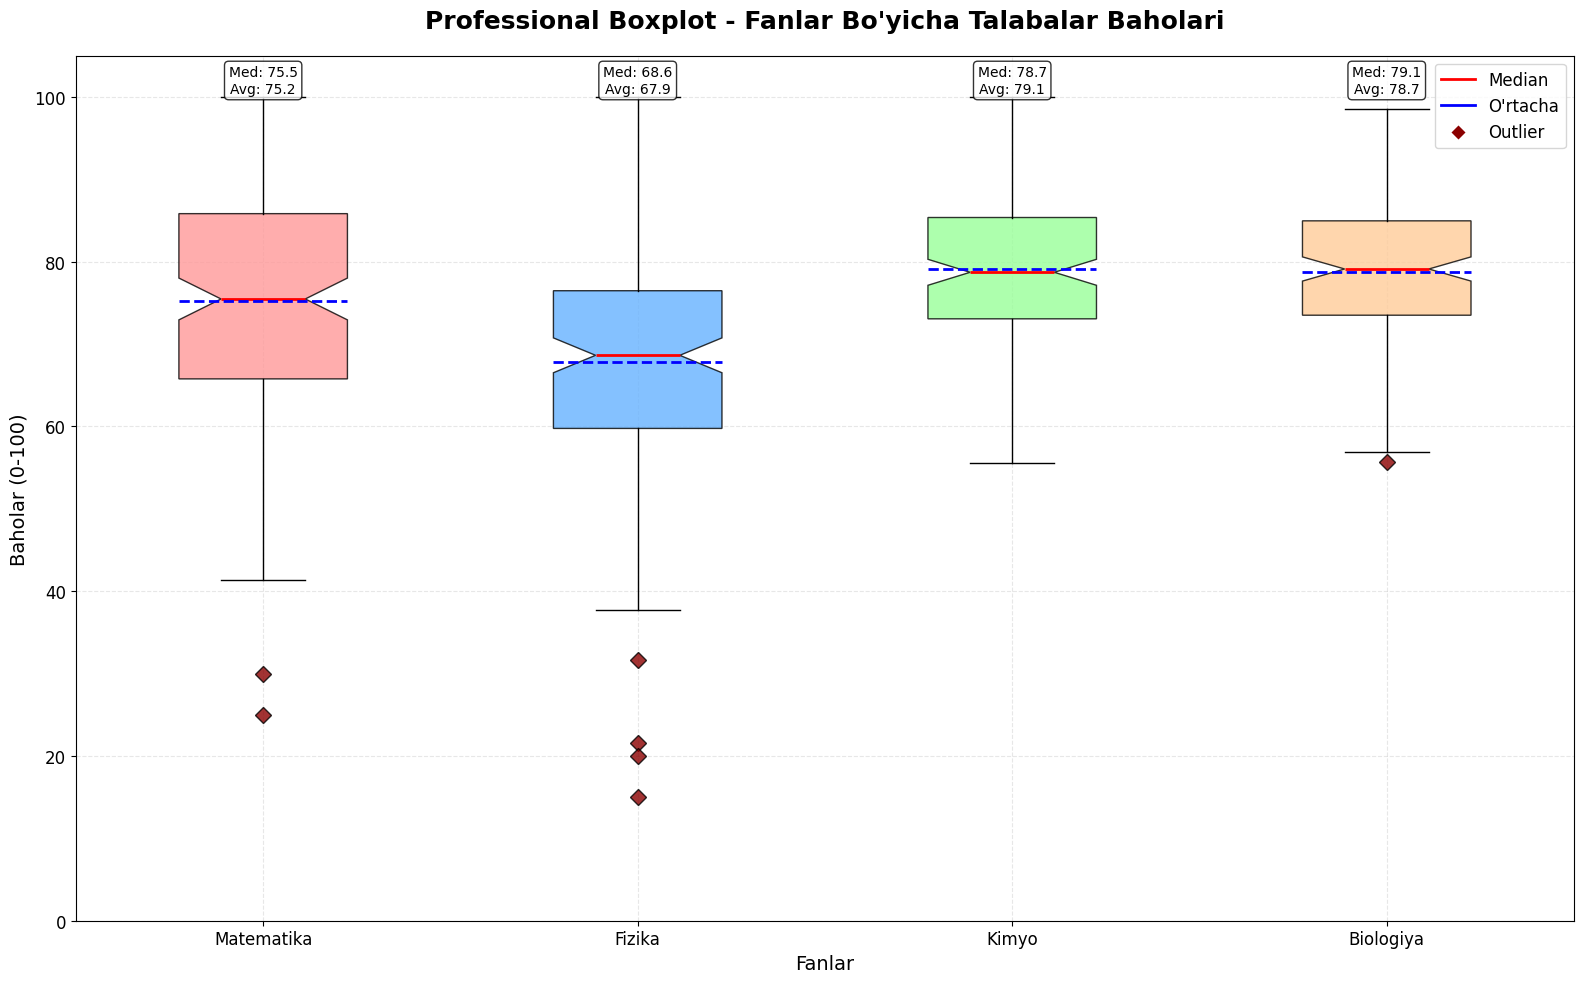

🎉 Professional boxplot tayyor!
✅ Bu notebook orqali siz boxplotning barcha sirlarini o'rgandingiz!
📊 Endi o'z ma'lumotlaringiz bilan ishlashingiz mumkin!


In [19]:
# Yakuniy misol - professional boxplot
plt.figure(figsize=(16, 10))

# Professional boxplot yaratish
bp = plt.boxplot(fanlar_data, 
                 labels=fanlar_nomi,
                 patch_artist=True,
                 notch=True,
                 showmeans=True,
                 meanline=True)

# Chiroyli ranglar
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

# O'rtacha chiziqlarini ko'k rangda
for mean in bp['means']:
    mean.set_color('blue')
    mean.set_linewidth(2)

# Median chiziqlarini qizil rangda
for median in bp['medians']:
    median.set_color('red')
    median.set_linewidth(2)

# Outlierlarni maxsus belgi bilan
for flier in bp['fliers']:
    flier.set_marker('D')
    flier.set_markerfacecolor('darkred')
    flier.set_markersize(8)
    flier.set_alpha(0.8)

plt.title('Professional Boxplot - Fanlar Bo\'yicha Talabalar Baholari', 
         fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Baholar (0-100)', fontsize=14)
plt.xlabel('Fanlar', fontsize=14)
plt.grid(True, alpha=0.3, linestyle='--')
plt.ylim(0, 105)

# Legend qo'shish
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='Median'),
    Line2D([0], [0], color='blue', lw=2, label="O'rtacha"),
    Line2D([0], [0], marker='D', color='w', markerfacecolor='darkred', 
           markersize=8, label='Outlier')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

# Har fan uchun statistika yozish
for i, (fan, data) in enumerate(zip(fanlar_nomi, fanlar_data)):
    median_val = np.median(data)
    mean_val = data.mean()
    plt.text(i+1, 102, f'Med: {median_val:.1f}\nAvg: {mean_val:.1f}', 
             ha='center', va='center', fontsize=10, 
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("🎉 Professional boxplot tayyor!")
print("✅ Bu notebook orqali siz boxplotning barcha sirlarini o'rgandingiz!")
print("📊 Endi o'z ma'lumotlaringiz bilan ishlashingiz mumkin!")